# Singular Value Decomposition (SVD)

**Singular Value Decomposition (SVD)** is a fundamental matrix factorization technique in linear algebra.  
It allows us to break down any real (or complex) matrix $A$ into three matrices with special properties:

$$
A = U \Sigma V^T
$$

Where:
- $A$ is an $m \times n$ matrix (the data matrix we want to decompose),
- $U$ is an $m \times m$ orthogonal matrix (columns are the **left singular vectors**),
- $\Sigma$ is an $m \times n$ diagonal matrix with non-negative real numbers on the diagonal (**singular values**),
- $V^T$ is an $n \times n$ orthogonal matrix (rows are the **right singular vectors**).

---

## Intuition Behind SVD

SVD can be thought of as a way of "rotating and stretching" space:

1. **$V^T$ (rotation in feature space):**  
   Aligns the data with new orthogonal directions (principal directions).
2. **$\Sigma$ (scaling):**  
   Stretches or shrinks these directions by the corresponding singular values.
3. **$U$ (rotation in output space):**  
   Maps the scaled vectors into the original space.

In short:  
- $V$ gives the **directions of variation** (basis in feature space).  
- $\Sigma$ tells us the **importance (magnitude) of each direction**.  
- $U$ tells us **how data projects onto these directions**.

---

## Geometric View

A matrix $A$ can be seen as a **linear transformation**.  
SVD shows that this transformation is equivalent to:

1. Rotating the axes,  
2. Stretching along the axes by singular values,  
3. Rotating again.

This explains why SVD is so powerful in applications like **dimensionality reduction** and **noise filtering**.




---

# Singular Value Decomposition (SVD)

**Singular Value Decomposition (SVD)** is a powerful matrix factorization that decomposes any real matrix $A$ into three interpretable components, providing both geometric insight and practical utility.

---

## Geometric Interpretation

SVD expresses a linear transformation $A$ as:

$$
A = U \Sigma V^T
$$

This can be visualized as a sequence of simpler operations:
1. **Rotate** using $V^T$
2. **Scale** along orthogonal axes using $\Sigma$
3. **Rotate** again using $U$

The following visuals illustrate how a unit circle (or sphere) becomes an ellipse by this transformation:


![SVD intuition](https://hadrienj.github.io/assets/images/ch12_svd/ch11_SVD_geometry.png)


---

## How It Works (SVD Mechanics)

Given $A \in \mathbb{R}^{m \times n}$, SVD yields:

- $U \in \mathbb{R}^{m \times m}$: **left singular vectors** (orthogonal)
- $\Sigma \in \mathbb{R}^{m \times n}$: **diagonal matrix** with singular values $\sigma_1 \ge \sigma_2 \ge \dots \ge 0$
- $V^T \in \mathbb{R}^{n \times n}$: **right singular vectors** (orthogonal)

Each singular triplet $(\sigma_i, u_i, v_i)$ satisfies:

$$
A v_i = \sigma_i u_i, \quad A^T u_i = \sigma_i v_i
$$

This means $v_i$ maps (via $A$) to $u_i$, scaled by $\sigma_i$.

---

## Visualizing Transformations

Here’s a more conceptual illustration of the “rotation → scaling → rotation” breakdown:


![SVD Visual](https://res.cloudinary.com/lesswrong-2-0/image/upload/f_auto%2Cq_auto/v1/mirroredImages/iupCxk3ddiJBAJkts/xxws7dynuhfjmqhpvymf)


---

## Low-Rank Approximation & Image Compression

To approximate $A$ with rank $k$, we can reconstruct using only the top $k$ singular triplets:

$$
A_k = U_k \Sigma_k V_k^T = \sum_{i=1}^k \sigma_i \, u_i v_i^T
$$

This is the **best possible rank-$k$** approximation in terms of both spectral and Frobenius norm.

For image compression, this means storing fewer values while preserving most of the visual content. The image below shows how approximations improve as more singular values are used:


![SVD Ranking](https://www.researchgate.net/publication/33427320/figure/fig1/AS%3A669550588743686%401536644708507/SVD-in-image-compression-View-the-m-n-image-as-a-matrix-The-rank-of-this-matrix.png)


And here’s another example highlighting reconstructions with increasing rank $k$ (e.g., in a grayscale image):


![SVD Ranking](https://dmicz.github.io/assets/img/svd_compression/svd_compression_28_0.png)


---

## Applications & Key Insights

- **Dimensionality Reduction / PCA**: Capture major axes of variation.
- **Noise Reduction**: Discard small singular values to filter noise.
- **Latent Semantic Analysis**: Extract latent topics from text.
- **Pseudoinverse**: Compute stable solutions to least squares via $A^+ = V \Sigma^+ U^T$.
- **Image Compression**: Approximate images with fewer components, balancing quality and storage.

**Takeaway:** SVD reveals how data is structured—how it stretches, aligns, and transforms. Keeping the principal components gives a compact yet informative summary of that data.










## Application to Image Compression
- We will use SVD to compress a squirrel image with different ranks
- We see how different ranks approximate the true image

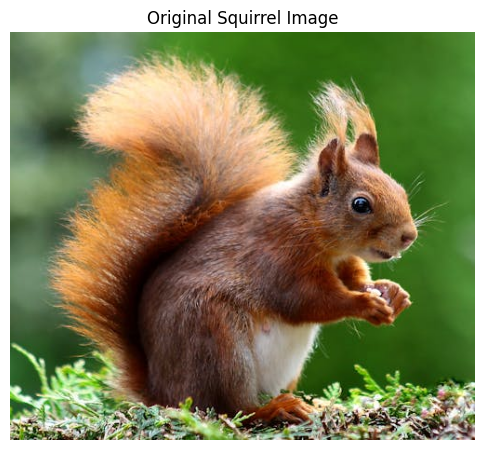

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Load the image
img = imread("squirrel_pic.jpeg")

# Show original image
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("Original Squirrel Image")
plt.axis("off")
plt.show()

Here is the image of the squirrel; we will convert to grayscale for simplicity.

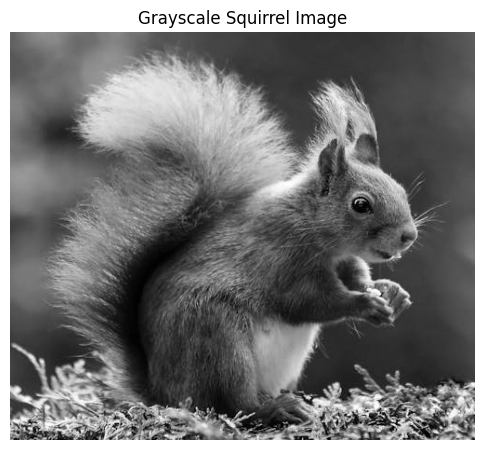

In [3]:
# Convert to grayscale if it's a color image
if img.ndim == 3:  # color image (RGB)
    img_gray = np.mean(img, axis=2)
else:
    img_gray = img

plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Squirrel Image")
plt.axis("off")
plt.show()


In [4]:
# We will use np.linalg.svd to compute the SVD
# perform SVD
U, S, VT = np.linalg.svd(img_gray, full_matrices=False)

print("U shape:", U.shape)
print("S shape:", S.shape)
print("VT shape:", VT.shape)

U shape: (439, 439)
S shape: (439,)
VT shape: (439, 500)


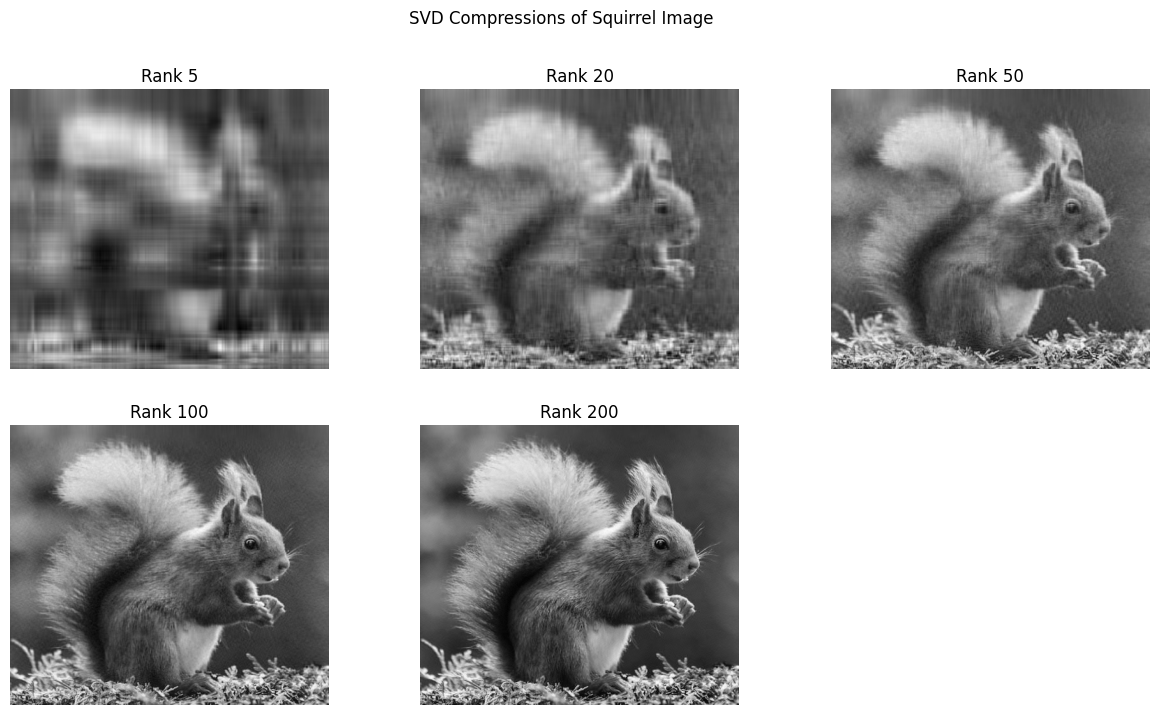

In [5]:
def svd_reconstruct(U, S, VT, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))

ks = [5, 20, 50, 100, 200]  # ranks to test

plt.figure(figsize=(15,8))
for i, k in enumerate(ks, 1):
    compressed_img = svd_reconstruct(U, S, VT, k)
    plt.subplot(2, 3, i)
    plt.imshow(compressed_img, cmap="gray")
    plt.title(f"Rank {k}")
    plt.axis("off")

plt.suptitle("SVD Compressions of Squirrel Image")
plt.show()


## Understanding Rank in SVD Compression

In the context of SVD, the **rank $k$** refers to the number of singular values (and corresponding singular vectors) we keep when reconstructing the image:

$$
A_k = U_k \, \Sigma_k \, V_k^T = \sum_{i=1}^k \sigma_i \, u_i v_i^T
$$

- $U_k$ contains the first $k$ left singular vectors
- $\Sigma_k$ contains the first $k$ singular values
- $V_k^T$ contains the first $k$ right singular vectors  

**Intuition:**  
- Each singular value $\sigma_i$ represents the "amount of variation" or "energy" captured along its corresponding direction.  
- Larger singular values capture more important features of the image, like broad shapes and major patterns.  
- Smaller singular values capture finer details, or sometimes noise.

**Choosing the Rank $k$:**  
1. **Visual inspection:** Start with a small $k$ and gradually increase it until the reconstructed image looks sufficiently similar to the original.  
2. **Variance (Energy) threshold:** Compute the fraction of total variance captured by the top $k$ singular values:

$$
\text{Energy}(k) = \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^r \sigma_i^2}
$$

   - Pick $k$ such that, for example, 90–95% of the energy is retained.  
3. **Storage vs. quality trade-off:** Higher $k$ increases storage and computation but improves reconstruction quality. The optimal $k$ balances these factors.  

In short, **rank $k$ controls the level of compression**:  
- Low $k$ → more compression, less detail  
- High $k$ → less compression, more detail  

This makes SVD a very flexible method for image compression and approximation.


## Autmatic Rank Selection Based on Energy
- Top singular values = most important features.

- Smaller singular values = fine details or noise.

- Rank selection is a trade-off: fewer singular values → more compression, less detail; more singular values → less compression, more detail.

In [7]:
# Compute cumulative energy
singular_values = S
total_energy = np.sum(singular_values**2)
cumulative_energy = np.cumsum(singular_values**2) / total_energy

# Choose ranks to retain >= 90%, 95%, 99% energy
thresholds = [0.90, 0.95, 0.99]
for t in thresholds:
    k = np.searchsorted(cumulative_energy, t) + 1
    print(f"Rank {k} retains {t*100}% of the energy")


Rank 3 retains 90.0% of the energy
Rank 8 retains 95.0% of the energy
Rank 41 retains 99.0% of the energy


In [6]:
original_size = img_gray.size
compressed_sizes = [U[:, :k].size + S[:k].size + VT[:k, :].size for k in ks]

for k, comp_size in zip(ks, compressed_sizes):
    print(f"Rank {k}: {comp_size} / {original_size} ({comp_size/original_size:.2%}) of original storage")


Rank 5: 4700 / 219500 (2.14%) of original storage
Rank 20: 18800 / 219500 (8.56%) of original storage
Rank 50: 47000 / 219500 (21.41%) of original storage
Rank 100: 94000 / 219500 (42.82%) of original storage
Rank 200: 188000 / 219500 (85.65%) of original storage


Overall, the image compression works well. Even when shrinking the storage space to ~8% of the original (Rank 20), the image retains a strong semblance to a squirrel.

## Error Analysis

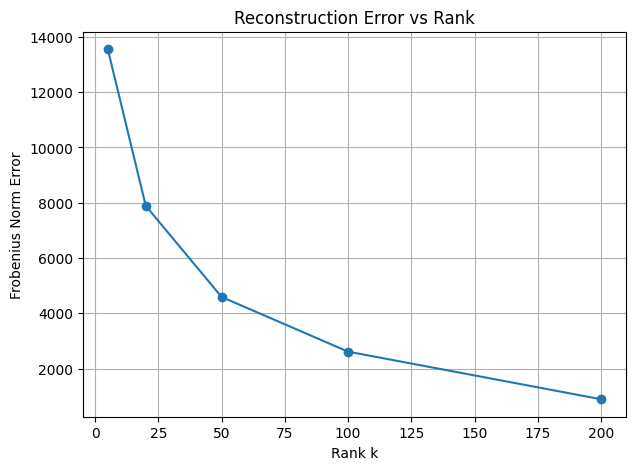

In [8]:
errors = []
for k in ks:
    compressed_img = svd_reconstruct(U, S, VT, k)
    error = np.linalg.norm(img_gray - compressed_img, 'fro')
    errors.append(error)

plt.figure(figsize=(7,5))
plt.plot(ks, errors, marker='o')
plt.title("Reconstruction Error vs Rank")
plt.xlabel("Rank k")
plt.ylabel("Frobenius Norm Error")
plt.grid(True)
plt.show()

The Frobenius norm of the difference between the original image and its SVD apprximation is calculated as $Error_k = ||A-A_k||_F$ where:

$A$ = original image matrix

$A_k$ = reconstructed image using top $k$ singular values

$| \cdot |_F$ = Frobenius norm (square root of sum of squared differences of all pixels)

Thus, as expected, when rank increases, the error decreases. We see it begin to plateau between rank 100 and 200.